In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('credit_risk_dataset.csv')

In [4]:
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:
data['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [10]:
data.shape

(32581, 12)

In [11]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [12]:
print('person_emp_length mode {}'.format(data['person_emp_length'].mode()[0]))
print('person_emp_length median {}'.format(data['person_emp_length'].median()))
print('loan_int_rate mode {}'.format(data['loan_int_rate'].mode()[0]))
print('loan_int_rate median {}'.format(data['loan_int_rate'].median()))

person_emp_length mode 0.0
person_emp_length median 4.0
loan_int_rate mode 7.51
loan_int_rate median 10.99


In [13]:
data['person_emp_length'].fillna(data['person_emp_length'].mode()[0], inplace=True)
data['loan_int_rate'].fillna(data['loan_int_rate'].median(), inplace=True)

In [14]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [15]:
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [16]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [17]:
cleaned_data = data[data['person_age']<=100]
cleaned_data = data[data['person_emp_length']<=60]
cleaned_data = data[data['person_income']<=4e6]

In [18]:
cleaned_data = pd.get_dummies(cleaned_data,columns=['person_home_ownership','loan_intent','cb_person_default_on_file','loan_grade'])

In [19]:
cleaned_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,1,0,0,0,1,0,0,0
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,1,0,0,1,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,1,0,0,0,1,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,1,0,0,0,1,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,1,0,0,1,0,0,0,0


In [20]:
X = cleaned_data.drop('loan_status',axis=1)
Y = cleaned_data['loan_status']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=23)

In [27]:
X_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
1919,26,57450,4.0,2000,13.35,0.03,2,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6336,23,49000,7.0,2400,7.66,0.05,3,1,0,0,...,0,1,0,1,0,0,0,0,0,0
7521,21,24000,0.0,6400,10.95,0.27,3,0,0,0,...,0,1,0,0,1,0,0,0,0,0
17863,28,165000,3.0,35000,11.49,0.21,9,0,0,0,...,0,1,0,0,1,0,0,0,0,0
5558,23,63900,7.0,5000,15.99,0.08,2,0,0,0,...,0,1,0,0,0,0,1,0,0,0


Decision Trees
Accuracy 0.899938612645795
Precision: 0.9627174813587407
Recall: 0.5546539379474941
F1 score: 0.7038158691701998


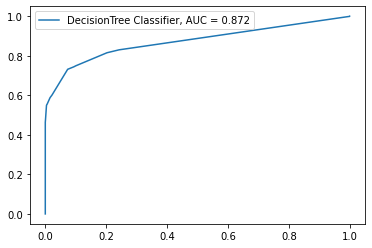

In [28]:
#Decision Trees
dtc = DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train, Y_train)
dtc_Y_pred = dtc.predict(X_test)
dtc_Prob_pred = dtc.predict_proba(X_test)[:,1]

# Calculate precision, recall, and F1 score
accuracy1 = accuracy_score(Y_test, dtc_Y_pred)
precision1 = precision_score(Y_test, dtc_Y_pred)
recall1 = recall_score(Y_test, dtc_Y_pred)
f11 = f1_score(Y_test, dtc_Y_pred)

# Print the results
print('Decision Trees')
print('Accuracy', accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 score:", f11)

dtc_fpr, dtc_tpr, dtc_threshold = roc_curve(Y_test, dtc_Prob_pred)
dtc_auclg = roc_auc_score(Y_test,dtc_Prob_pred)
plt.plot(dtc_fpr, dtc_tpr, label=f'DecisionTree Classifier, AUC = {str(round(dtc_auclg,3))}')
plt.legend()

Logistic Regression
Accuracy 0.8063228974831185
Precision: 0.7121848739495799
Recall: 0.16181384248210023
F1 score: 0.2637106184364061


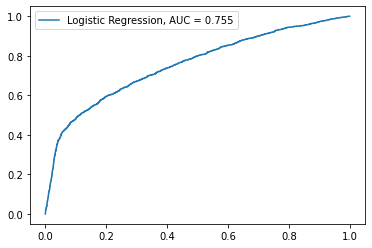

In [29]:
#Logistic Regression
log = LogisticRegression()
log.fit(X_train, Y_train)
log_Y_pred = log.predict(X_test)
log_Prob_pred = log.predict_proba(X_test)[:,1]

# Calculate precision, recall, and F1 score
accuracy2 = accuracy_score(Y_test, log_Y_pred)
precision2 = precision_score(Y_test, log_Y_pred)
recall2 = recall_score(Y_test, log_Y_pred)
f12 = f1_score(Y_test, log_Y_pred)

# Print the results
print('Logistic Regression')
print('Accuracy', accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("F1 score:", f12)

log_fpr, log_tpr, threshold = roc_curve(Y_test, log_Prob_pred)
log_auclg = roc_auc_score(Y_test,log_Prob_pred)
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression, AUC = {str(round(log_auclg,3))}')
plt.legend()

In [40]:
for i,param in enumerate(X_train.columns):
    print('Parameter= %s; Coefficient='%(param),log.coef_[0][i])

Parameter= person_age; Coefficient= -5.177033877029273e-08
Parameter= person_income; Coefficient= -4.0179540884958725e-05
Parameter= person_emp_length; Coefficient= -2.360649480984293e-08
Parameter= loan_amnt; Coefficient= 0.00010552925750118883
Parameter= loan_int_rate; Coefficient= 8.536066295712147e-08
Parameter= loan_percent_income; Coefficient= 2.626602886434782e-09
Parameter= cb_person_cred_hist_length; Coefficient= -8.196693381979495e-09
Parameter= person_home_ownership_MORTGAGE; Coefficient= -6.356119213369287e-09
Parameter= person_home_ownership_OTHER; Coefficient= 7.877530683988594e-11
Parameter= person_home_ownership_OWN; Coefficient= -3.932673778425558e-09
Parameter= person_home_ownership_RENT; Coefficient= 8.164973305036697e-09
Parameter= loan_intent_DEBTCONSOLIDATION; Coefficient= 2.6537998571166195e-09
Parameter= loan_intent_EDUCATION; Coefficient= -3.1234621604804323e-09
Parameter= loan_intent_HOMEIMPROVEMENT; Coefficient= 1.7505923262029325e-09
Parameter= loan_intent_M

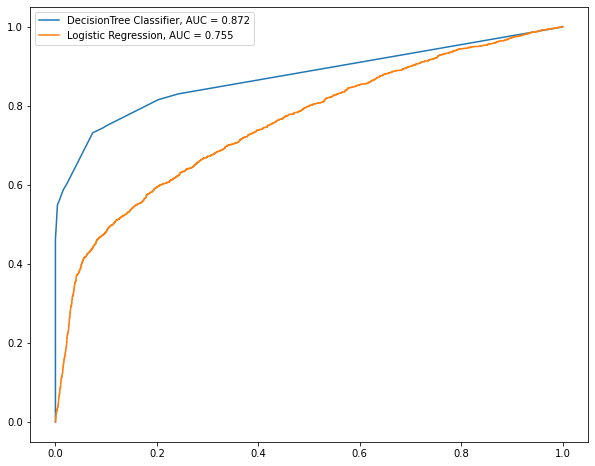

In [44]:
plt.figure(figsize=(10,8))
plt.plot(dtc_fpr, dtc_tpr, label=f'DecisionTree Classifier, AUC = {str(round(dtc_auclg,3))}')
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression, AUC = {str(round(log_auclg,3))}')
plt.legend()